In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pprint


In [86]:
import numpy as np
import pandas as pd

In [87]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [88]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()

In [89]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [90]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)


In [91]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [92]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [93]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [94]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x210bbef5c08>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [95]:
# Calculate the date 1 year ago from the last data point in the database
last_day = session.query(Measurement).order_by(Measurement.date.desc()).first().date
last_day


'2017-08-23'

In [96]:
last_12months=dt.datetime.strptime(last_day, '%Y-%m-%d') - dt.timedelta(days=365)
last_12months


datetime.datetime(2016, 8, 23, 0, 0)

In [97]:
# Perform a query to retrieve the data and precipitation scores
precip_date_query=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >last_12months).order_by(Measurement.date).all()
precip_date_query


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [98]:

# Save the query results as a Pandas DataFrame and set the index to the date column
precp_date_df=pd.DataFrame(precip_date_query,columns=["Date","Precipitation"])
precp_date_df.sort_values(by=['Date'], ascending=False)
precp_date_df.set_index('Date',inplace=True)
precp_date_df = precp_date_df[precp_date_df['Precipitation'].notna()]

precp_date_df


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


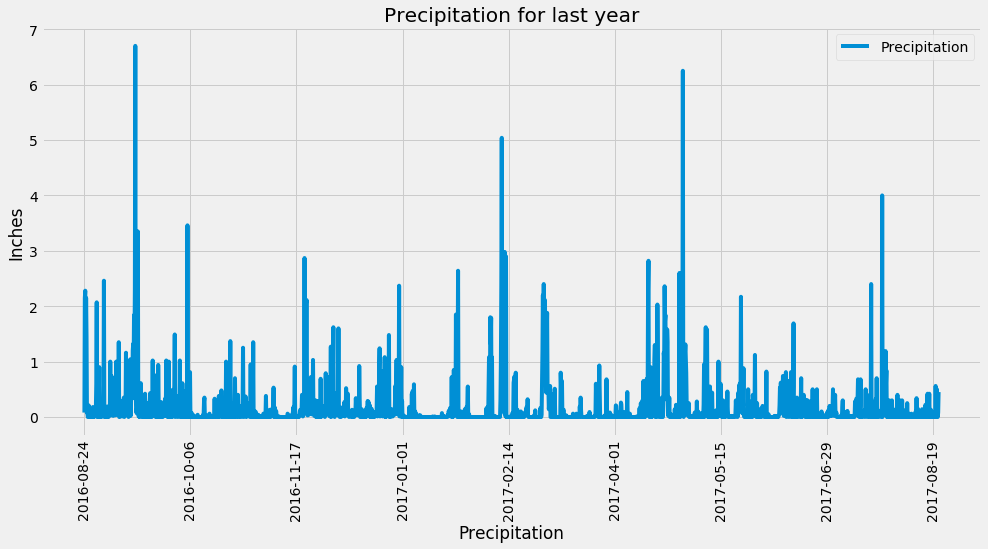

In [99]:
# Use Pandas Plotting with Matplotlib to plot the data
precp_date_df.plot(title="Precipitation for last year",rot=90,figsize=(15, 7))

plt.xlabel("Precipitation")
plt.ylabel("Inches")
plt.tight_layout
plt.show()

In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measuerment_sumary=precp_date_df["Precipitation"].describe()
measuerment_sumary


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [101]:
measuerment_first_row = session.query(Measurement).first()
measuerment_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x210bc1422c8>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [102]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x210bbef5c08>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [103]:
# Design a query to show how many stations are available in this dataset?
number_of_stations=session.query(Station.station, func.count(Station.station)).group_by(Station.station).count()
number_of_stations

9

In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
list_of_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
list_of_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [105]:
highest_number_of_observation=session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_number_of_observation

('USC00519281')

In [106]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_day=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_day

'2017-08-23'

In [107]:
date_before_12months=dt.datetime.strptime(last_day,"%Y-%m-%d")- dt.timedelta(days=365)
date_before_12months

datetime.datetime(2016, 8, 23, 0, 0)

In [108]:
# highest temperature recorded
max_tobs_query=session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
max_tobs_query

[('USC00519281', 83.0)]

In [109]:
#lowest temperature
min_tobs_query=session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
min_tobs_query

[('USC00519281', 59.0)]

In [110]:
#average temperature
avg_tobs_query=session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').all()
avg_tobs_query

[('USC00519281', 73.0968660968661)]

In [111]:
date_tobs_query=session.query(Measurement.tobs).filter(Measurement.date > date_before_12months).filter(Measurement.station =='USC00519281').order_by(Measurement.tobs.desc()).all()
date_tobs_query

[(83.0),
 (82.0),
 (82.0),
 (82.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 

In [112]:
temp_df=pd.DataFrame(date_tobs_query,columns=["tobs"])
temp_df.head()

,tobs
0,83.0
1,82.0
2,82.0
3,82.0
4,81.0


Text(0.5, 0, 'Temperature')

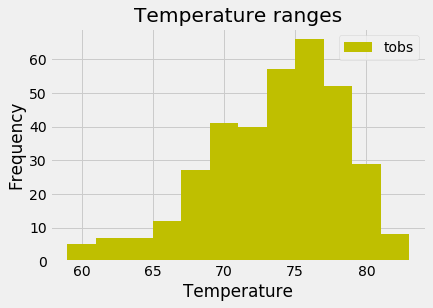

In [113]:
temp_df.plot.hist(density=False,bins=12,color='y',title="Temperature ranges")
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [114]:
session.close()